## Texi Guru Kaggle Challange

### important imports and data extraction

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

### Importing data

In [432]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()
train_pd.info()

running on local machine
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amoun

null vales detection 

In [433]:
train_pd.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

**Creating copies of test data and train data**

In [434]:
train_pd = copy_train_pd.copy()
# TODO: will check and can be done after applying preprocessing
# y = train_pd['total_amount']
# X = train_pd.drop('total_amount', axis= 1)
# list_of_features = list()

In [435]:
x_train, x_test = train_test_split(train_pd, test_size= 0.1)
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

### Preprocessing section
* Selection of important features
* transformation of features
* features plotting
* correlation detection among features
* apply pca for dimensionality reduction



In [436]:
print('Null values in the given training data set is:')
x_train.isna().sum()

Null values in the given training data set is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5437
trip_distance               0
RatecodeID               5437
store_and_fwd_flag       5437
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     5437
Airport_fee              5437
dtype: int64

In [437]:
print(f'''
unique values of passanger_count is: {x_train['passenger_count'].unique()}\n
unique values of RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {x_train['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {x_train['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {x_train['Airport_fee'].unique()}\n
''')



unique values of passanger_count is: [nan  1.  5.  2.  3.  0.  4.  6.  9.  8.]

unique values of RateCodeId is: [nan  1.  2. 99.  4.  5.  3.]

unique values of store_and_fwd_flag is: [nan 'N' 'Y']

unique values of congestion_surcharge is: [ nan  2.5  0.  -2.5]

unqiue values of airport_fees is: [  nan  0.    1.75 -1.75]




**According to my observations vendorId is also an categorical vairable and ratecodeid also becuase these items are ids which are represented as numbers**

In [438]:
print(f''' 
unique values for vendorId is: {x_train['VendorID'].unique()}\n
unique values for RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique valuse for PULocationID is: {x_train['PULocationID'].unique()}\n
unique valuse for DoLocationID is: {x_train['DOLocationID'].unique()}\n
''')

 
unique values for vendorId is: [1 0 2]

unique values for RateCodeId is: [nan  1.  2. 99.  4.  5.  3.]

unique valuse for PULocationID is: [ 87  40   8 210 220  72  97 171 116 124 211 149 161  32 156 217 252 258
 120  10 132  58 150  85 263 172 111 100 135  93  94 248 190 259 117  30
 239 123 227  20 143   6 201 110  26 205 223  75  49 255  88 225 241  13
 230  61 139 199  27  84  21 250  45 204  35 112 192   1  77  15  41  14
 184 236 235  82  73 104 260 234 181  28  79 264  70  51  81 191 222 215
 251  68 102  59  24 170 105 194 254 173  99  83 144 174  36 121  53   7
 153  89  78 212  50 113  63 162 159  74  98  91 226 231 197 189 137  23
   9  47 193 103  42 142 129  55  92 134  25 146 245 256 133  86 178 108
 246  29 122  46 128 257  34  12 238 147  38 218  11  19 243 141 187 244
 164 114 240  64 219  31  18 109 183 261 262 242 107 249 233 168 200 131
 207 180 198 101 232  76  90 127 177 152  22  80 247 229  17 179 154  66
  69 221 253 130  57 126   4 208  54  65  56  33 237  71

In [439]:
x_train.describe() #* Description of complete data elements

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,157500.000000,152063.000000,157500.000000,152063.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,152063.000000,152063.000000
mean,0.728527,1.358924,5.309869,1.517943,132.597568,132.705714,1.931602,6.125860,0.647671,0.979325,29.624515,2.246454,0.158655
std,0.445562,0.892431,416.332556,6.512979,76.174350,76.191834,1.948407,4.474400,2.337693,0.200482,25.385021,0.820463,0.512117
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.477234,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286439,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.499415,0.000000,1.000000,31.822500,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,184.313458,80.000000,1.000000,587.250000,2.500000,1.750000


### Plot chart preparation
plots different types of plots for batter insight

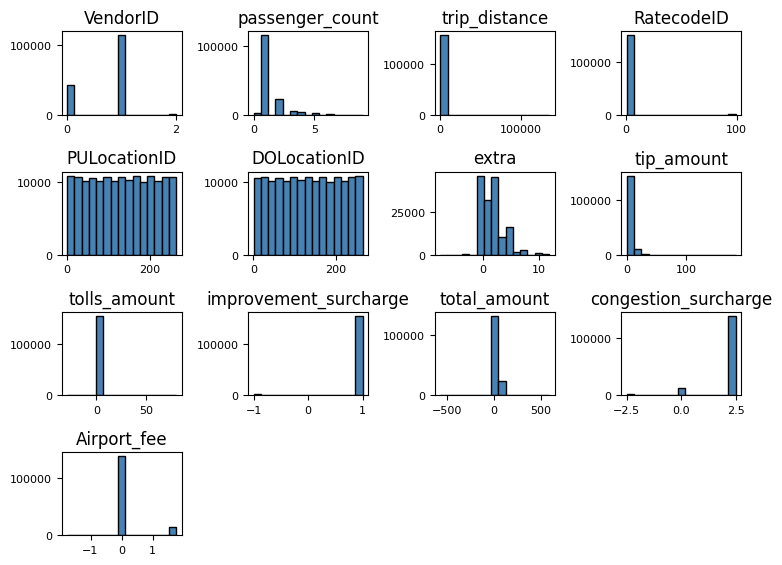

In [440]:
x_train.hist(bins= 15, color= 'steelblue', edgecolor='black', linewidth= 1.0,
             xlabelsize= 8, ylabelsize= 8, grid= False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### plotting pair waise plot for corelation detection

In [441]:
# sns.pairplot(X) ## Do not run this cell again
#* please prefer pairplot.png for details

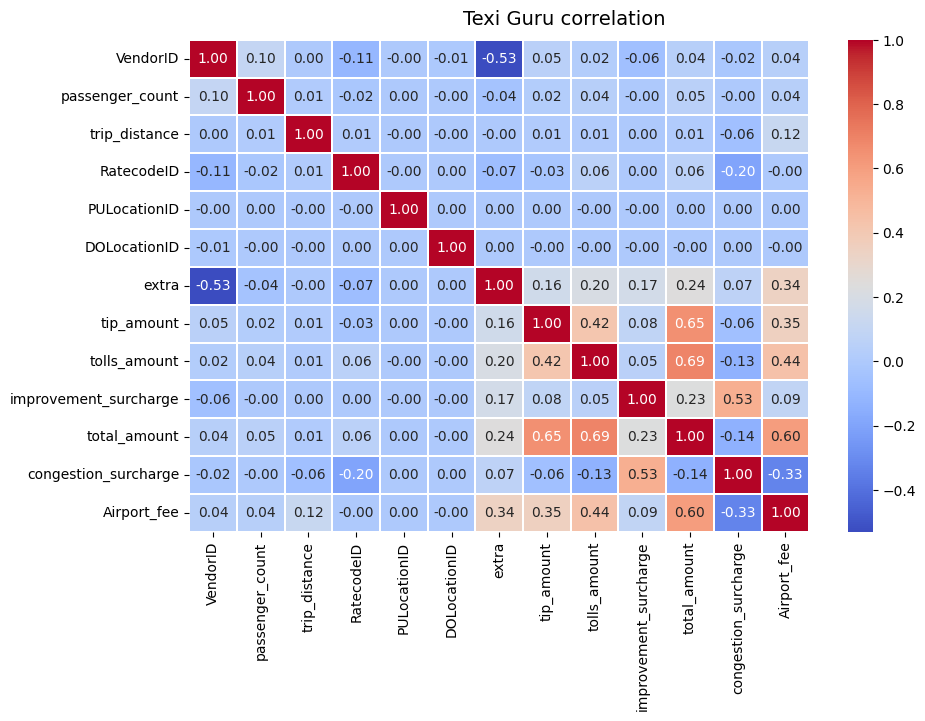

In [442]:
f, ax = plt.subplots(figsize=(10,6))
corr = x_train.corr(numeric_only= True)
heat_map = sns.heatmap(round(corr, 2), annot= True, ax=ax, cmap='coolwarm',
                       fmt='.2f', linewidths=0.05)
f.subplots_adjust(top= 0.93)
t = f.suptitle('Texi Guru correlation', fontsize= 14)


#### Converting datetime into datetime object

In [443]:
def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

In [444]:
x_train, x_test = x_train_copy.copy(), x_test_copy.copy()

convert_dt_obj_to_datetime(x_train, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_pickup_datetime')
x_train = x_train.drop('tpep_pickup_datetime', axis= 1)
x_test = x_test.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(x_train, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_dropoff_datetime')

x_train = x_train.drop('tpep_dropoff_datetime', axis= 1)
x_test = x_test.drop('tpep_dropoff_datetime', axis= 1)

x_train.info()
x_train_copy, x_test_copy = x_train.copy(), x_test.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 157500 entries, 43420 to 169873
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     157500 non-null  int64  
 1   passenger_count              152063 non-null  float64
 2   trip_distance                157500 non-null  float64
 3   RatecodeID                   152063 non-null  float64
 4   store_and_fwd_flag           152063 non-null  object 
 5   PULocationID                 157500 non-null  int64  
 6   DOLocationID                 157500 non-null  int64  
 7   payment_type                 157500 non-null  object 
 8   extra                        157500 non-null  float64
 9   tip_amount                   157500 non-null  float64
 10  tolls_amount                 157500 non-null  float64
 11  improvement_surcharge        157500 non-null  float64
 12  total_amount                 157500 non-null  float64
 13  

In [445]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,157500.000000,152063.000000,157500.000000,152063.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,...,152063.000000,152063.000000,157500.0,157500.000000,157500.000000,157500.000000,157500.0,157500.000000,157500.000000,157500.000000
mean,0.728527,1.358924,5.309869,1.517943,132.597568,132.705714,1.931602,6.125860,0.647671,0.979325,...,2.246454,0.158655,2023.0,6.004298,29.060889,15.113556,2023.0,6.007911,28.965638,15.097651
std,0.445562,0.892431,416.332556,6.512979,76.174350,76.191834,1.948407,4.474400,2.337693,0.200482,...,0.820463,0.512117,0.0,0.065421,1.985113,5.773368,0.0,0.088592,2.602422,5.954018
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,-2.500000,-1.750000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.477234,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286439,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.499415,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,184.313458,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


### trying to remove outliers form the dataset

In [446]:
x_train = x_train_copy.copy() # reseting dataset
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))
train_pd_filtered_toll_amt = x_train[(x_train.tolls_amount >= 0)]

print('len of wallet user', len(train_pd_filtered_toll_amt[train_pd_filtered_toll_amt.payment_type == 'Wallet']))
train_pd_filtered_extra = train_pd_filtered_toll_amt[(train_pd_filtered_toll_amt.extra >= 0)]

print('len of wallet user', len(train_pd_filtered_extra[train_pd_filtered_extra.payment_type == 'Wallet']))
# train_pd_filtered_airport_fee = train_pd_filtered_extra.copy() # TODO: need to check for batter solution 
print('airport unique values before filter', train_pd_filtered_extra.Airport_fee.unique())
print('total number of nan valuse in airport fees', train_pd_filtered_extra.Airport_fee.isna().sum())


train_pd_filtered_airport_fee =  train_pd_filtered_extra[(train_pd_filtered_extra.Airport_fee != -1.75)]


print('airport unique values after filter', train_pd_filtered_airport_fee.Airport_fee.unique())
print('len of wallet user', len(train_pd_filtered_airport_fee[train_pd_filtered_airport_fee.payment_type == 'Wallet']))
## same assumption with negative congestion surcharge and improvement surcharge
train_pd_filtered_improvement_surcharge = train_pd_filtered_airport_fee[(train_pd_filtered_airport_fee.improvement_surcharge >= 0)]


print('len of wallet user', len(train_pd_filtered_improvement_surcharge[train_pd_filtered_improvement_surcharge.payment_type == 'Wallet']))
print('congestion surcharge unique', train_pd_filtered_improvement_surcharge['congestion_surcharge'].unique())


train_pd_filtered_congestion_surcharge = train_pd_filtered_improvement_surcharge.copy() #TODO: need to check batter solution
# train_pd_filtered_congestion_surcharge = train

print('len of wallet user', len(train_pd_filtered_congestion_surcharge[train_pd_filtered_congestion_surcharge.payment_type == 'Wallet']))

x_train = train_pd_filtered_congestion_surcharge.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())

x_train.info()
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))


len of wallet user 5437
len of wallet user 5437
len of wallet user 5437
airport unique values before filter [  nan  0.    1.75 -1.75]
total number of nan valuse in airport fees 5437
airport unique values after filter [ nan 0.   1.75]
len of wallet user 5437
len of wallet user 5437
congestion surcharge unique [nan 2.5 0. ]
len of wallet user 5437
vendor ids after outlier removal [1 0 2]
<class 'pandas.core.frame.DataFrame'>
Index: 155921 entries, 43420 to 169873
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     155921 non-null  int64  
 1   passenger_count              150484 non-null  float64
 2   trip_distance                155921 non-null  float64
 3   RatecodeID                   150484 non-null  float64
 4   store_and_fwd_flag           150484 non-null  object 
 5   PULocationID                 155921 non-null  int64  
 6   DOLocationID            

In [447]:
### removing distance outliers
print(len(x_train[x_train.trip_distance > 100]))
x_train_distance_fitler = x_train[x_train.trip_distance <= 100]
x_train = x_train_distance_fitler.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))

6
vendor ids after outlier removal [1 0 2]
len of wallet user 5434


**X_train after applying basic filteration of the data**

In [448]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,155915.000000,150481.000000,155915.000000,150481.000000,155915.000000,155915.000000,155915.000000,155915.000000,155915.000000,155915.000000,...,150481.000000,150481.000000,155915.0,155915.000000,155915.000000,155915.000000,155915.0,155915.000000,155915.000000,155915.000000
mean,0.725774,1.358703,3.676688,1.521129,132.593856,132.692826,1.965193,6.161429,0.659830,0.999370,...,2.291004,0.163137,2023.0,6.004297,29.060257,15.117122,2023.0,6.007908,28.965058,15.102062
std,0.446972,0.893542,4.840627,6.546660,76.164219,76.168573,1.923097,4.479127,2.335318,0.022884,...,0.691964,0.508800,0.0,0.065412,1.984875,5.768198,0.0,0.088576,2.601967,5.948958
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000435,0.000000,0.000000,...,0.000000,0.000000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.090000,1.000000,67.000000,67.000000,0.000000,3.511531,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.750000,5.328319,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.528999,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,84.160000,99.000000,264.000000,264.000000,11.750000,184.313458,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


#### Basic outlier removal completed 


### Creating pipeline for linear regression and SGD Regression
* create pipelines for features scaling
* create shufflesplit for cross validation

In [449]:
cv_shuffle_20 = ShuffleSplit(n_splits= 20, test_size= 0.2)
cv_shuffle_5 = ShuffleSplit(n_splits= 5, test_size= 0.2)

In [450]:
x_train_filtered_copy = x_train.copy()

In [451]:
x_train = x_train_filtered_copy.copy()
x_test = x_test_copy.copy()
y_train = x_train['total_amount']
x_train = x_train.drop('total_amount', axis= 1)
y_test = x_test['total_amount']
x_test = x_test.drop('total_amount', axis= 1)

### dividing train set into com_train_set and dev_train_set


In [452]:
com_train_features, dev_test_features, com_train_labels, dev_test_labels = train_test_split(x_train, y_train, test_size= 0.2)

#### Creating pipelines for features scaling

In [453]:
vendor_id_pipe = Pipeline([
  ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
    ('std_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
       ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant',
                                         fill_value= 1)),
       ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore')) ## TODO: experimental changes
])

store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scale', StandardScaler())
])

payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])

In [454]:
feature_scaline_pipeline = ColumnTransformer([
  # ('vendor_id', vendor_id_pipe, ['VendorID']),
  ('passanger_count', passanger_count_pipe, ['passenger_count']),
  ('rate_code_id', rate_code_id_pipe, ['RatecodeID']), # experimental changes
  ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
  ('pu_loc', StandardScaler(), ['PULocationID']),
  ('du_loc', StandardScaler(), ["DOLocationID"]),
  ('payment_t', payment_type_pipe, ['payment_type']),
  ('extra_t', StandardScaler(), ['extra']),
  ('tip_amount_t', StandardScaler(), ['tip_amount']),
  ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
  ('improvement_c', StandardScaler(), ['improvement_surcharge']),
  ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
  ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
  ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder='passthrough')
feature_scaline_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('passanger_count',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count']),
                                ('rate_code_id',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handl...
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scale',
                                                  StandardScaler())]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

### creating a linear regression model

In [455]:
col_trans = feature_scaline_pipeline.fit_transform(com_train_features)

print(col_trans.shape)
lin_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(com_train_features, com_train_labels)

(124732, 32)


Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('o...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('lin_reg', LinearRegression())])

In [456]:
cols_name = feature_scaline_pipeline.get_feature_names_out()
len(cols_name)

32

In [457]:
col_trans_pd = pd.DataFrame(col_trans, columns= cols_name)
pca = PCA(svd_solver= 'full', n_components= 20).fit(col_trans_pd)
pca.singular_values_
# pca.n_components_
print(sum(pca.explained_variance_ratio_))
print(pca.components_)
pca.get_feature_names_out()



0.9990909884988556
[[ 1.03178640e-02 -2.95985193e-02  2.40146257e-02  2.41736038e-03
   1.89776647e-03  7.37387217e-04  5.31379465e-04  2.07716547e-04
  -2.07716547e-04  2.99053959e-04 -5.47957037e-04 -1.01271983e-04
  -1.98717277e-03 -2.07881975e-04  2.39677084e-03 -1.00444116e-04
   3.34689345e-02  1.10028342e-01  1.33554094e-01 -1.87825310e-03
  -6.47209778e-02  1.30658060e-01  0.00000000e+00  2.14866858e-03
  -1.27495712e-03 -6.95383205e-03  0.00000000e+00  7.46387054e-03
  -6.06461110e-03 -9.57200102e-03  4.16632203e-03  9.72541635e-01]
 [ 4.48902379e-03  1.10073541e-03 -7.34953985e-04 -4.61701174e-04
   3.22024451e-05  1.10672262e-04 -4.69549630e-05  1.33083370e-04
  -1.33083370e-04  2.93650415e-03 -7.55514298e-04 -7.85224279e-04
   5.77134130e-04 -6.31949052e-05  3.91315441e-05  2.32153511e-04
  -2.14662349e-02 -9.88749804e-03 -1.30302418e-02 -1.32136934e-03
   3.57771632e-03 -4.33573652e-03  3.76158192e-37  4.88636441e-01
  -4.78402235e-01 -9.50653030e-02 -2.72636629e-41  5.005

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19'], dtype=object)

In [458]:
lin_reg_pipeline.score(com_train_features, com_train_labels)

0.9079476596441097

In [459]:
from sklearn.metrics import r2_score

r2_score(com_train_labels, lin_reg_pipeline.predict(com_train_features))

0.9079476596441097

In [460]:
print(lin_reg_pipeline.score(dev_test_features, dev_test_labels))
r2_score(dev_test_labels, lin_reg_pipeline.predict(dev_test_features))

0.9193404198543359


0.9193404198543359

In [461]:
print(lin_reg_pipeline.score(x_test, y_test))
r2_score(y_test, lin_reg_pipeline.predict(x_test))

0.8537100084917915


0.8537100084917915

In [462]:
lin_reg_pipeline[:-1].get_feature_names_out(input_features= com_train_features.columns)

array(['passanger_count__passenger_count', 'rate_code_id__RatecodeID_1.0',
       'rate_code_id__RatecodeID_2.0', 'rate_code_id__RatecodeID_3.0',
       'rate_code_id__RatecodeID_4.0', 'rate_code_id__RatecodeID_5.0',
       'rate_code_id__RatecodeID_99.0',
       's_nd_f_flag__store_and_fwd_flag_N',
       's_nd_f_flag__store_and_fwd_flag_Y', 'pu_loc__PULocationID',
       'du_loc__DOLocationID', 'payment_t__payment_type_Cash',
       'payment_t__payment_type_Credit Card',
       'payment_t__payment_type_UPI', 'payment_t__payment_type_Wallet',
       'payment_t__payment_type_unknown', 'extra_t__extra',
       'tip_amount_t__tip_amount', 'tolls_amount_t__tolls_amount',
       'improvement_c__improvement_surcharge',
       'cong_charge__congestion_surcharge', 'Airport_fee_t__Airport_fee',
       'std_scaler__tpep_pickup_datetime_Year',
       'std_scaler__tpep_pickup_datetime_Month',
       'std_scaler__tpep_pickup_datetime_Day',
       'std_scaler__tpep_pickup_datetime_Hour',
       'st

In [463]:
from sklearn.feature_selection import RFE 

selector = RFE(lin_reg_pipeline, n_features_to_select= 10, step= 1)
print(type(com_train_features))
feature_scaline_pipeline.fit(com_train_features)
com_train_t = feature_scaline_pipeline.fit_transform(com_train_features)


print(type(com_train_t))
# selector = selector.fit(com_train_t, com_train_labels)
# print(selector.support_)

# print(selector.ranking_)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


#### Trying hyper parameters of linear regression

In [464]:
# lin_reg_params = 

### searching best params using SGD Regressor

In [465]:
sgd_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('pca', PCA()),
  ('sgd', SGDRegressor())
])
sgd_reg_pipeline

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('o...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('pca', PCA()), ('sgd', SGDRegressor())])

In [466]:
sgd_reg_pipeline.fit(com_train_features, com_train_labels)
print('score on com train labels',  sgd_reg_pipeline.score(com_train_features, com_train_labels))
print('scroe of dev train labels', sgd_reg_pipeline.score(dev_test_features, dev_test_labels))
print('score of test labels', sgd_reg_pipeline.score(x_test, y_test))


score on com train labels 0.90651597031617
scroe of dev train labels 0.9180318966882958
score of test labels 0.7555934231633747


In [467]:
r2_score(com_train_labels, sgd_reg_pipeline.predict(com_train_features))

0.90651597031617

### testing LASSO regression for basic test analysis

In [468]:
lasso_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('pca', PCA()),
  ('lasso', Lasso())
])
# print(lasso_reg_pipeline)
lasso_reg_pipeline.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('o...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('pca', PCA()), ('lasso', Lasso())])

In [469]:
print('score on com train labels',  lasso_reg_pipeline.score(com_train_features, com_train_labels))
print('scroe of dev train labels', lasso_reg_pipeline.score(dev_test_features, dev_test_labels))
print('score of test labels', lasso_reg_pipeline.score(x_test, y_test))

score on com train labels 0.8670152519093103
scroe of dev train labels 0.8798036000681625
score of test labels 0.8426642557264119


### testing ridge regression

In [470]:
ridge_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('pca', PCA()),
  ('ridge', Ridge())
])
ridge_reg_pipeline.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('o...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('pca', PCA()), ('ridge', Ridge())])

In [471]:
print('score on com train labels',  ridge_reg_pipeline.score(com_train_features, com_train_labels))
print('scroe of dev train labels', ridge_reg_pipeline.score(dev_test_features, dev_test_labels))
print('score of test labels', ridge_reg_pipeline.score(x_test, y_test))

score on com train labels 0.9079480306431158
scroe of dev train labels 0.9193591780628582
score of test labels 0.8536896809215253


## transforming test

In [472]:
# x_test_t = lin_reg_pipeline.transform(x_test)
print(x_train.VendorID.unique())
print(x_test.VendorID.unique())

# x_test_t = feature_scaline_pipeline.transform(x_test)
lin_reg_pipeline.score(x_test, y_test)

[1 0 2]
[0 1 2]


0.8537100084917915

### Submission code starting from here

In [473]:
copy_test_pd.copy()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [474]:
test_pd_t = copy_test_pd.copy()
convert_dt_obj_to_datetime(test_pd_t, 'tpep_pickup_datetime')
test_pd_t = test_pd_t.drop('tpep_pickup_datetime', axis= 1)
test_pd_t.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VendorID                    50000 non-null  int64  
 1   tpep_dropoff_datetime       50000 non-null  object 
 2   passenger_count             48221 non-null  float64
 3   trip_distance               50000 non-null  float64
 4   RatecodeID                  48221 non-null  float64
 5   store_and_fwd_flag          48221 non-null  object 
 6   PULocationID                50000 non-null  int64  
 7   DOLocationID                50000 non-null  int64  
 8   payment_type                50000 non-null  object 
 9   extra                       50000 non-null  float64
 10  tip_amount                  50000 non-null  float64
 11  tolls_amount                50000 non-null  float64
 12  improvement_surcharge       50000 non-null  float64
 13  congestion_surcharge        482

In [475]:
convert_dt_obj_to_datetime(test_pd_t, 'tpep_dropoff_datetime')
test_pd_t = test_pd_t.drop('tpep_dropoff_datetime', axis= 1)
test_pd_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VendorID                     50000 non-null  int64  
 1   passenger_count              48221 non-null  float64
 2   trip_distance                50000 non-null  float64
 3   RatecodeID                   48221 non-null  float64
 4   store_and_fwd_flag           48221 non-null  object 
 5   PULocationID                 50000 non-null  int64  
 6   DOLocationID                 50000 non-null  int64  
 7   payment_type                 50000 non-null  object 
 8   extra                        50000 non-null  float64
 9   tip_amount                   50000 non-null  float64
 10  tolls_amount                 50000 non-null  float64
 11  improvement_surcharge        50000 non-null  float64
 12  congestion_surcharge         48221 non-null  float64
 13  Airport_fee     

In [476]:
test_pd_t.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
0,1,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,...,2.5,0.0,2023,6,29,0,2023,6,29,0
1,1,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,...,2.5,0.0,2023,6,30,17,2023,6,30,17
2,1,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,...,2.5,0.0,2023,6,29,18,2023,6,29,19
3,0,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,...,2.5,0.0,2023,6,30,21,2023,6,30,21
4,1,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,...,0.0,0.0,2023,6,29,14,2023,6,29,15


In [477]:
prediction = lin_reg_pipeline.predict(test_pd_t)

In [480]:
submission = pd.DataFrame(columns= ['ID', "total_amount"])
submission['ID'] = [i for i in range(1, 50001)]
submission['total_amount'] = prediction
submission.to_csv('submission.csv', index=False)

In [481]:
submission.describe()

,ID,total_amount
count,50000.000000,5.000000e+04
mean,25000.500000,-1.049505e+06
std,14433.901067,2.346835e+08
min,1.000000,-5.247683e+10
25%,12500.750000,1.776828e+01
50%,25000.500000,2.181439e+01
75%,37500.250000,2.978595e+01
max,50000.000000,5.987969e+04
